In [1]:
## Done by Nayan Man Singh Pradhan

## Importing Libraries

In [2]:
## importing
import pandas as pd
import numpy as np
import urllib.request
import json
import string
import spacy
from spacy.lang.de.stop_words import STOP_WORDS
import nltk
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from google_trans_new import google_translator

## Reading and Visualizing Data

In [3]:
## reading data
df = pd.read_json('https://talentbait-assets.s3.eu-central-1.amazonaws.com/tech_soft_none.json')
# df = pd.read_json('dataset.json')
df = pd.json_normalize(df['data'])
df.head()

,text,label
0,"Standort Trovarit AG München, Deutschland",none
1,Wir freuen uns auf Ihre Bewerbung unter Angabe...,none
2,Qualifikation zur Heimleitung gemäß Heimperson...,tech
3,Gute organisatorische und konzeptionelle Fähig...,soft
4,"Teamfähigkeit, hohe Flexibilität und Einsatzbe...",soft


In [4]:
## defining names
text = df['text']
label = df['label']

none    4325
soft    3635
tech    2289
Name: label, dtype: int64


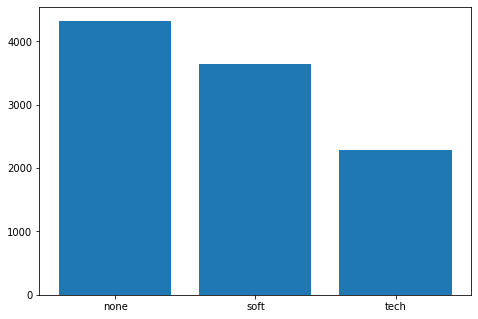

In [5]:
## checking data
print(df["label"].value_counts())

## visualizing
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ["none", "soft", "tech"]
y_axis = [df["label"].value_counts()[0],df["label"].value_counts()[1],df["label"].value_counts()[2]]
ax.bar(x_axis, y_axis)
plt.show()

## Cleaning data

In [6]:
## helpers for data cleaning
punctuation = string.punctuation
stop_words = list(STOP_WORDS)
nlp = spacy.load('de_core_news_sm')
numbers = string.digits
# print(stop_words)

In [7]:
## function that cleans input text
def cleaning_function(input_text):
    text = nlp(input_text)
    tokens = []
    for token in text:
        temp = token.lemma_.lower()
        tokens.append(temp)

    cleaned_tokens = []
    for token in tokens:
        if token not in stop_words and token not in punctuation and token not in numbers:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [8]:
## test
# cleaned_text = cleaning_function(text[1])
# print(cleaned_text)

## Classifying Data: Training and Testing

In [9]:
## variables for train and test data
X = text
y = label

<a id='SVC_score'></a>
### SVC training and score

In [10]:
## SVC using tfidf (bag of words)

tfidf = TfidfVectorizer(tokenizer = cleaning_function)
classifier = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)
SVC_clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])
SVC_clf.fit(X_train, y_train)
y_pred = SVC_clf.predict(X_test)

print("Classification Report for SVC:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for SVC:")
print(confusion_matrix(y_test, y_pred))

Classification Report for SVC:
              precision    recall  f1-score   support

        none       0.94      0.98      0.96      1337
        soft       0.94      0.94      0.94      1068
        tech       0.94      0.87      0.90       670

    accuracy                           0.94      3075
   macro avg       0.94      0.93      0.93      3075
weighted avg       0.94      0.94      0.94      3075

Confusion Matrix for SVC:
[[1313   13   11]
 [  43 1000   25]
 [  43   46  581]]


<a id='KNN_score'></a>
### KNN training and score

In [11]:
## KNN using tfidf (bag of words)

tfidf = TfidfVectorizer(tokenizer = cleaning_function)
classifier = KNeighborsClassifier(n_neighbors=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)

KNN_clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])
KNN_clf.fit(X_train, y_train)
y_pred = KNN_clf.predict(X_test)

print("Classification Report for KNN:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for KNN:")
print(confusion_matrix(y_test, y_pred))

Classification Report for KNN:
              precision    recall  f1-score   support

        none       0.65      0.99      0.79      1337
        soft       0.96      0.70      0.81      1068
        tech       0.95      0.37      0.53       670

    accuracy                           0.75      3075
   macro avg       0.85      0.69      0.71      3075
weighted avg       0.82      0.75      0.74      3075

Confusion Matrix for KNN:
[[1326    8    3]
 [ 313  744   11]
 [ 394   27  249]]


## Testing Trained Model on User Input
<a id='TTMUI'></a>

In [12]:
## predicting via user input

user_input_text = input("Enter your input in German: ")

## additional translation feature if input is not in German
translator = google_translator()
if(translator.detect(user_input_text)[0]!='de'):
    print("Input language detected:", translator.detect(user_input_text)[1])
    in_german = translator.translate(user_input_text, lang_tgt='de')
    print("Translated to German:", in_german)
    user_input_text = in_german

svc_pred = SVC_clf.predict([user_input_text])
knn_pred = KNN_clf.predict([user_input_text])

print("\n")

print ("Prediction via SVC:", svc_pred[0])
print ("Prediction via KNN:", knn_pred[0])

Enter your input in German: gute Kommunikationsfähigkeiten


Prediction via SVC: soft
Prediction via KNN: soft


## Visualizing most Frequent Words for Different Labels after Cleaning Data
<a id='VMFWDL'></a>

In [13]:
## splitting data based on label

only_tech_tokens = []
only_soft_tokens = []
only_none_tokens = []

for i in range(0, text.shape[0]):
    clean_token = cleaning_function(text[i])
    
    if label[i] == "tech":
        for t in clean_token:
            only_tech_tokens.append(t)
            
    elif label[i] == "soft":
        for t in clean_token:
            only_soft_tokens.append(t)
            
    else:
        for t in clean_token:
            only_none_tokens.append(t)
            
freq_tech_tokens = nltk.FreqDist(only_tech_tokens)
freq_soft_tokens = nltk.FreqDist(only_soft_tokens)
freq_none_tokens = nltk.FreqDist(only_none_tokens)

### Most frequent word in label: 'none'
<a id='g_none'></a>

Visual representation of most common words used in dataset of label 'none'


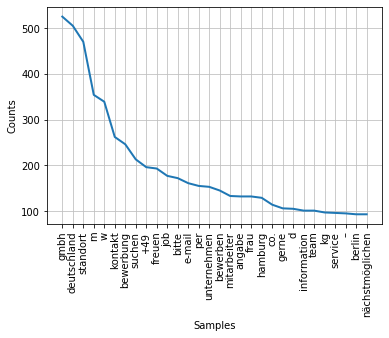

In [14]:
## most common words used in dataset of label none
print("Visual representation of most common words used in dataset of label 'none'")
freq_none_tokens.plot(30, cumulative=False)

### Most frequent word in label: 'tech'
<a id='g_tech'></a>

Visual representation of most common words used in dataset of label 'tech'


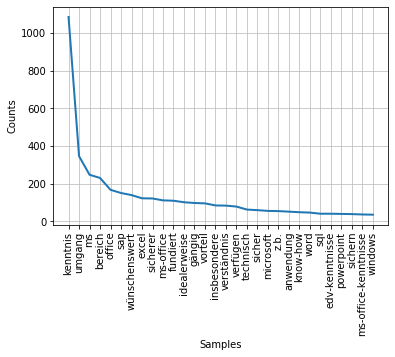

In [15]:
## most common words used in dataset of label tech
print("Visual representation of most common words used in dataset of label 'tech'")
freq_tech_tokens.plot(30, cumulative=False)

### Most frequent word in label: 'soft'
<a id='g_soft'></a>

Visual representation of most common words used in dataset of label 'soft'


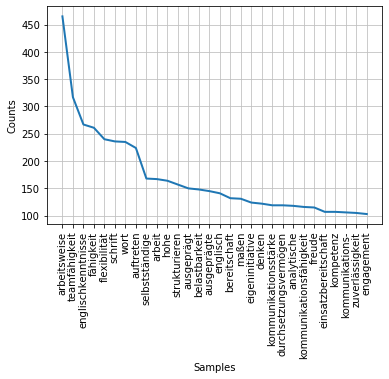

In [16]:
## most common words used in dataset of label soft
print("Visual representation of most common words used in dataset of label 'soft'")
freq_soft_tokens.plot(30, cumulative=False)

## Hosting web application

In [17]:
## anvil to host web application
import anvil.server
anvil.server.connect("I6ZCACWHQSGJRHKJKAK4CEPD-KDZYNHP6HUKJWUBA")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [18]:
@anvil.server.callable
def predict_class(user_input):
    translator = google_translator()
    if(translator.detect(user_input)[0]!='de'):
        user_input = translator.translate(user_input, lang_tgt='de')
    return (SVC_clf.predict([user_input])[0])

**Accessible via:**
https://KDZYNHP6HUKJWUBA.anvil.app/TYLJ73PI6MEOA76NVDBMX4JS

## Command Line Application
**Accessible via running:**
_python3 application.py_
**in terminal**

## Explaination of my Model and Approach

My classification pipeline consists of a **tfidf element** and a **classifier element**.

The tfidf element converts the sentences into tokens and cleans the input data. In order to clean the input data, I made a function that does the following:
1. Convert the sentences into tokens
2. Lemmatisation/Stemming of the tokens such that words like wir -> ich, bin -> sein etc belong to the same 'stem'
3. Convert all alphabets into lower case alphabets
4. Remove stop words like: weiter, solchen, zehntes
5. Remove punctuations like: .,!

After the data is cleaned, the tfidf (term frequency-inverse document frequency) is responsible of giving weights (importance) to words based on the logarithmic ratio of the number of documents to the document frequency of the word. That means, if a word is common in all three labels, the word is given less weight as compared to another word that is only present in one label.

I tested the classifier element with two classifying algorithms: Linear SVC and KNN. I observed that the Linear SVC performed much better than the KNN, hence, I used the model from the Linear SVC for my web application and command line application. The Linear SVC model gave good and accurate results, hence, it is a good model for the dataset. The SVC is good for this task because the instance is of a very high dimension and the feature vectors are sparse, which makes differentiating areas for distinct feature space more accurate. The full classification report and confusion matrix for Linear SVC and KNN can be found here:

[Linear SVC Score](#SVC_score)  
[KNN Score](#KNN_score)

After I got the classification report, I tested the model using my own input text (under [Testing Trained Model on User Input](#TTMUI)). I also added an **additional feature** which allows the user to input the text in any language supported by the 'google_trans_new' library (The list of supported languages can be found in [this](https://duyguaran.medium.com/how-to-use-google-trans-new-346ab827a4eb) article). The algorithm detects the input language and translates the text into German (if the detected text is not in German) and feeds the translated text into the pipeline in order to predict the label. This feature is also implemented in the Web Application and Command Line Application.

In order to visualize the data, I made 3 additional graphs (under [Visualizing most Frequent Words for Different Labels](#VMFWDL) that graphs the 30 most frequent words in the x-axis and their count in the y-axis for the 3 different labesl: [none](#g_none), [tech](#g_tech), and [soft](#g_soft). This frequency data can be used to observe/visualize what tokens/words were the most common/weighted while classifying the data.

The web application is hosted by Anvil. It can be accessed by connecting the the server and opening the link on any computer.

The Command Line Application is made by using two files: 'pickle_dumper.py' and 'application.py'. 'pickle_dumper.py' is where the data is trained and dumped into the pickle file and the 'application.py' file is where the command prompt UI is made and prediciton is done. Only running 'python3 application.py' through terminal executes the program.

## Suggestions
- Maybe in the future, the dataset could have more than 3 labels such that the candidates can classify the skills in more detail.